In [428]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt
a = 1.0
b = 1
tspan = np.linspace(0.0, 3.0, 100)
x0 = 0

def f(x, t,a=1):
    return -(a + x)#*(1 - x**2)

def g(x, t):
    return b*(1)

mean = lambda m,r,t,x0 : m*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
var = lambda r,s,t,v_x0: (s**2 / (2*r))*(np.exp(r*t)-np.exp(-r*t))+np.exp(-r*t)*v_x0

CPU times: user 500 ms, sys: 11.5 ms, total: 512 ms
Wall time: 516 ms


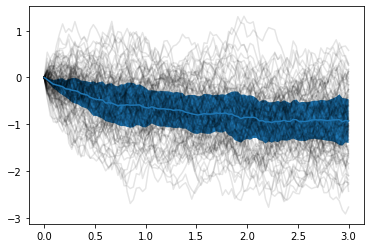

In [392]:
%%time
r=[]
for i in range(100):
    result = sdeint.itoint(f, g, x0, tspan)
    mean,var=np.mean(result),np.var(result)
    plt.plot(tspan,result,alpha=0.1,c="k")
    r.append(result)
plt.plot(tspan,np.array(r).mean(axis=0))
y1=(np.array(r).mean(axis=0)+np.var(np.array(r),axis=0)).reshape(-1,)
y2=(np.array(r).mean(axis=0)-np.var(np.array(r),axis=0)).reshape(-1,)
plt.fill_between(tspan,y1,y2)

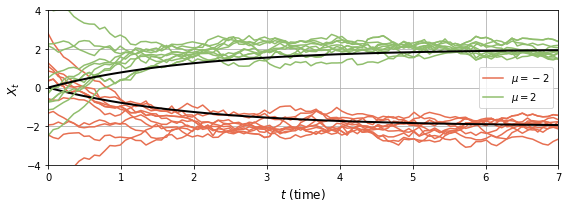

In [395]:
a = -2
b = .5
m = 1
tspan = np.linspace(0.0, 7.0, 100)
x0 = 0

def f(x, t):
    return m*(a - x)

def g(x, t):
    return b


fig,ax=plt.subplots(figsize=(8,3))
ax.grid()
for i in range(10):
    x0=np.random.normal(0,2)
    result = sdeint.itoint(f, g, x0, tspan)
    ax.plot(tspan,result,alpha=1,c="#e76f51")
ax.plot(tspan,result,alpha=1,c="#e76f51",label="$\mu=-2$")  
ax.plot(tspan,mean(m,b,tspan,0),c="k",lw=2)    

a=2
for i in range(10):
    x0=np.random.normal(0,2)
    result = sdeint.itoint(f, g, x0, tspan)
    ax.plot(tspan,result,alpha=1,c="#90be6d")
ax.plot(tspan,result,alpha=1,c="#90be6d",label="$\mu=2$")  
ax.set_ylabel("$X_t$",fontsize=12)
ax.set_xlabel("$t$ (time)",fontsize=12)
ax.set_ylim(-4,4)
ax.set_xlim(0,7)
ax.legend()

# var= lambda s,g,t: s**2/(2*m) * (1-np.exp(-2*m*t))

ax.plot(tspan,mean(m,b,tspan,0),c="k",lw=2)
plt.tight_layout()
# plt.savefig("figs/paths.png",dpi=300)

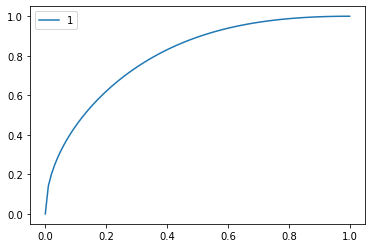

In [185]:
def g1(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x=np.linspace(-2000,2000,850)
g=g1(x,0,5)
f=g1(x,0,5)
def h(mu1,mu2,s1,s2):
    a=np.sqrt(2*s1*s2/(s1**2 + s2**2))
    b=-0.25*(mu1-mu2)**2 / (s1**2 + s2**2)
    return (a*np.exp(b))
m=np.linspace(0,1,100)
for s2 in [1]:#np.linspace(1,4,10):
    plt.plot(m,h(1,s2,m,1),label=s2)
plt.legend()

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

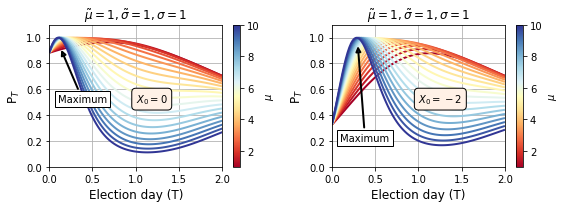

In [429]:
mean = lambda u,r,t,x0 : u*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
t=np.linspace(0,2,100)
n=20


U=np.linspace(1,10,n)
p=[]
x=[]
for u in U:
    mu1=mean(u,1,t,0)
    s1=var(r=1,s=1,t=t,v_x0=1)
    p.append(h(mu1,mu2=1,s1=s1,s2=1))
    x.append(t)
fig, ax1 = plt.subplots(1,2,figsize=(8,3))
ax=ax1[0]
lc = multiline(x, p, U, cmap='RdYlBu', lw=2,ax=ax)

axcb = fig.colorbar(lc,label="$\mu$",ax=ax)
ax.set_title("$\\tilde{\mu}=1,\\tilde{\sigma}=1,\sigma=1$")
ax.set_ylim(0,1.1)
ax.set_xlim(0,2)
ax.grid()
ax.set_ylabel("P$_T$",fontsize=12)
ax.set_xlabel("Election day (T)",fontsize=12)
ax.annotate("Maximum",xy=[.13,.92],xytext=[.1,.5],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2),
            bbox=dict(boxstyle='square', fc='w', ec='k'))
ax.annotate("$X_0=0$",xytext=[1,.5],xy=[1,.5],bbox=dict(fc='#fff1e6', ec='k',boxstyle='round,pad=.4'))
ax=ax1[1]
U=np.linspace(1,10,n)
p=[]
x=[]
for u in U:
    mu1=mean(u,1,t,-2)
    p.append(h(mu1,mu2=1,s1=s1,s2=1))
    x.append(t)
lc = multiline(x, p, U, cmap='RdYlBu', lw=2,ax=ax)

axcb = fig.colorbar(lc,label="$\mu$",ax=ax)
ax.set_title("$\\tilde{\mu}=1,\\tilde{\sigma}=1,\sigma=1$")
ax.set_ylim(0,1.1)
ax.set_xlim(0,2)
ax.grid()
ax.set_xlabel("Election day (T)",fontsize=12)
ax.set_ylabel("P$_T$",fontsize=12)
ax.annotate("Maximum",xy=[.3,.95],xytext=[.1,.2],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2),
            bbox=dict(boxstyle='square', fc='w', ec='k'))
ax.annotate("$X_0=-2$",xytext=[1,.5],xy=[1,.5],bbox=dict(fc='#fff1e6', ec='k',boxstyle='round,pad=.4'))

plt.tight_layout()
# plt.savefig("paper/figs/pt_mu.png",dpi=300)

In [427]:
mean = lambda m,r,t,x0 : m*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
var = lambda r,s,t,v_x0: (s**2 / (2*r))*(1-np.exp(-2*r*t))+np.exp(-r*t)*v_x0

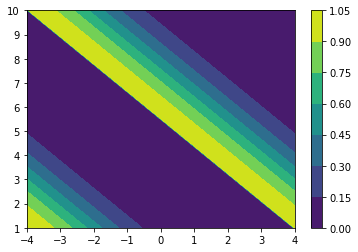

In [366]:
n=150
U=np.linspace(1,10,n)
X0=np.linspace(-4,4,n+1)
p=[]
for x0 in X0:
    for u in U:
        mu1=mean(u,1,10000,x0)
        p.append(h(mu1,mu2=1,s1=1,s2=1))

p=np.array(p).reshape(n,n+1)
plt.contourf(X0,U,p)
plt.colorbar()

# $ dX_t=\gamma(m-X_t)dt+\sigma dB_t $
#### $ E[X_t]=m(1-e^{-\gamma t})+e^{-\gamma t} E[X_0] $
### $ Cov[X_u,X_t]=\frac{\sigma^2}{ 2 \gamma}e^{-\gamma u}( e^{\gamma t}- e^{-\gamma t} ) +e^{-\gamma (u+t)} var[X_0] $

In [5]:

mean = lambda m,g,x0,t: m+ (x0-m)*np.exp(-g*t)
var= lambda s,g,t: s**2/(2*g) * (1-np.exp(-2*b*t))

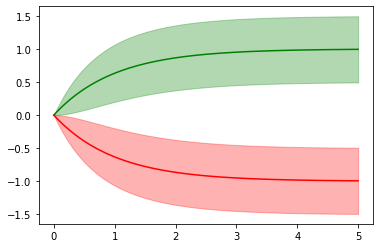

In [4]:
g=1;m=1;s=1;x0=0
t=np.linspace(0,5,100)

c="g"
plt.plot(t,mean(m,g,x0,t),c=c)
y1=mean(m,g,x0,t)-var(s,g,t)
y2=mean(m,g,x0,t)+var(s,g,t)
plt.fill_between(t,y1,y2,alpha=0.3,color=c)


m=-1

c="r"
plt.plot(t,mean(m,g,x0,t),c=c)
y1=mean(m,g,x0,t)-var(s,g,t)
y2=mean(m,g,x0,t)+var(s,g,t)
plt.fill_between(t,y1,y2,alpha=0.3,color=c)

In [ ]:
%%time
def f(u,p,t):
    return 1.01*u

def g(u,p,t):
    return 0.87*u

u0 = 0.5
tspan = (0.0,1.0)
prob = de.SDEProblem(f,g,u0,tspan)

for i in range(900):
    sol = de.solve(prob,reltol=1e-2,abstol=1e-3)
    plt.plot(sol.t,sol.u,c="k",alpha=0.1)
plt.show()

In [47]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import sdepy
import numpy as np
import matplotlib.pyplot as plt  # optional, if plots are needed
plt.rcParams['figure.figsize'] = (11., 5.5)
plt.rcParams['lines.linewidth'] = 1.

def e(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [3]:
@sdepy.integrate
def my_process(t, x, theta=1., k=1., sigma=1.):
    return {'dt': k*(theta - x), 'dw': sigma}

In [16]:
coarse_timeline = (0., 0.25, 0.5, 0.75, 1.0)
timeline = np.linspace(0., 6., 500)

In [52]:

np.random.seed(1)  # make doctests predictable
x = my_process(x0=0, paths=1000,
               steps=100,theta=10,sigma=4)(timeline)
x.shape

(500, 1000)

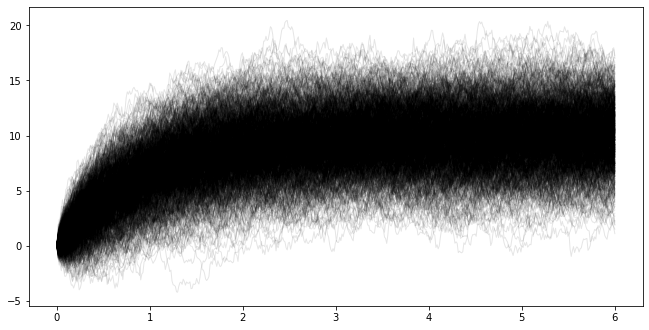

In [22]:
plt.plot(timeline,x,c="k",alpha=0.1)
plt.show()

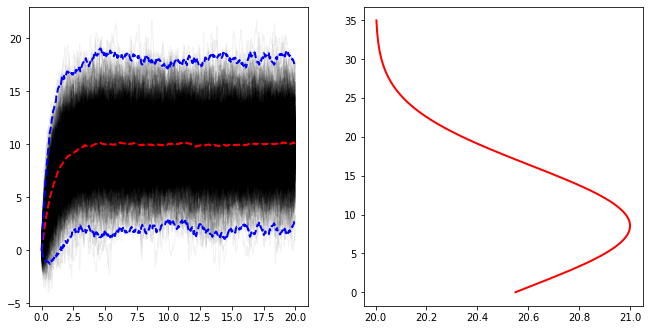

In [157]:
timeline = np.linspace(0., 20., 500)
# sigma=lambda t:1+0.5*(1+np.sign(t-2))

# theta=lambda t:10+4*(1+np.sign(t-10))


np.random.seed(1)  # make doctests predictable
x = my_process(x0=0, paths=1000,
               steps=100,theta=10,sigma=4)(timeline)


fig,ax1=plt.subplots(1,2)
ax=ax1[0]
ax.plot(timeline,x,c="k",alpha=0.05)

ax.plot(timeline,np.mean(x,axis=1),c="r",lw=2,ls="--")
ax.plot(timeline,np.mean(x,axis=1)+1*np.var(x,axis=1),c="b",lw=2,ls="--",alpha=1)
ax.plot(timeline,np.mean(x,axis=1)-1*np.var(x,axis=1),c="b",lw=2,ls="--",alpha=1)


ax=ax1[1]
m=np.mean(x[:,-1]);var=np.var(x[:,-1])
xm=np.linspace(0,35,100)
ax.plot(e(xm,m,var)+timeline[-1],xm,c="r",lw=2)
plt.show()

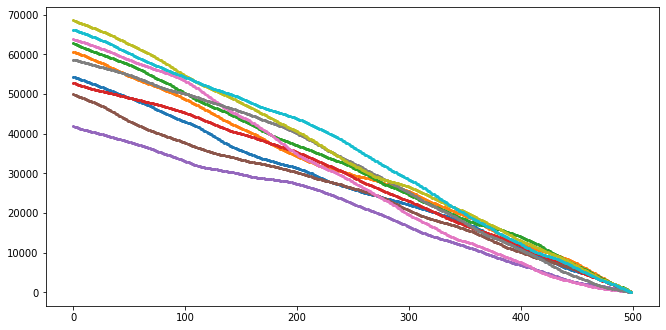

In [158]:
for i in range(10):
    plt.plot([np.correlate(x[:,i],x[:,i][t:]).mean() for t in np.arange(0,len(timeline))],marker="o",markersize=2)

In [159]:
corr=[[np.correlate(x[:,i],x[:,i][t:]).mean() for t in range(x.shape[0])] for i in range(x.shape[1])]
corr=np.array(corr)

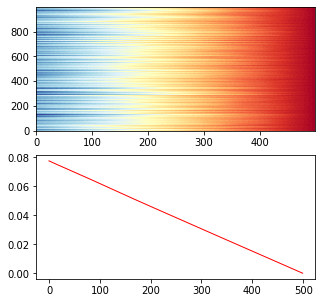

In [169]:
norm=lambda x :x/np.linalg.norm(x)
fig,ax1=plt.subplots(2,1,figsize=(5,5))
ax=ax1[1]
ax.plot(norm(np.mean(corr,axis=0)),c="r")
ax=ax1[0]
ax.contourf(corr,90,cmap="RdYlBu")
plt.show()

In [11]:
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

In [2]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

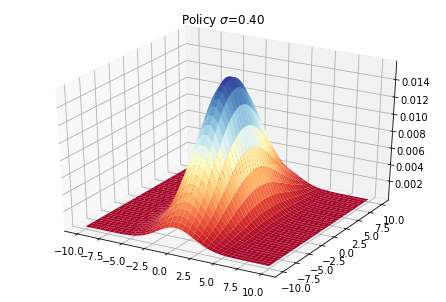

In [15]:
def gauss(sx=2,sy=2):
    size = 40
    sigma_x = sx
    sigma_y = sy

    X = np.linspace(-10, 10, size)
    Y = np.linspace(-10, 10, size)

    x, y = np.meshgrid(X, Y)
    z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
         + y**2/(2*sigma_y**2))))
    return x,y,z

def update_graph(sx):
    x,y,z=gauss(sx,sy=2)
    ax.plot_surface(x,y, z,cmap="RdYlBu")
    ax.set_title("Policy var={:.2d}".format(sx))
fig = plt.figure()
ax = p3.Axes3D(fig)
x,y,z=gauss(sx=2,sy=5)
ax.plot_surface(x,y, z,cmap="RdYlBu")
ax.set_title("Policy $\\sigma$={:.2f}".format(0.4))
plt.savefig("policy.png",dpi=300)
plt.show()
# ani = animation.FuncAnimation(fig, update_graph,  frames=np.linspace(0.1,4,40))
# plt.rcParams["animation.convert_path"]="/usr/local/bin/convert"
# ani.save("/Users/santy/Desktop/test.gif",writer="imagemagick")

In [2]:
import matplotlib.pyplot as plt

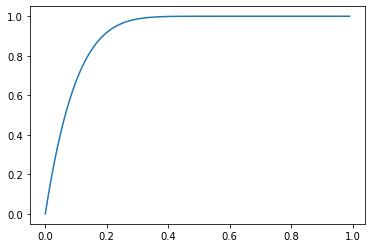

In [24]:
x=np.linspace(0,.99,101)
plt.plot(x,1-np.exp(10*x/(x-1)))

In [405]:
from sympy import *
import numpy as np

In [409]:
r,mu,s,x,y, t = symbols('r \\mu \\sigma x y t',real=True,positive=True)
a,b,c,d,t1 = symbols('a b c d t1',real=True,positive=True)
s1=s**2 *(1-exp(-2*r*t))/r
dd=integrate(1/sqrt(pi*d) * exp( -(a+t1)**2 / d),(t1,0,oo))
final=dd.subs(d,s1).subs(a,-mu-(x-mu)*exp(-r*t))
final.subs(t,oo).subs([(r,1),(s,1),(mu,4)]).evalf()

0.999999992291371

In [410]:
print(latex(final))

1 - \frac{\operatorname{erfc}{\left(- \frac{\sqrt{r} \left(- \mu - \left(- \mu + x\right) e^{- r t}\right)}{\sigma \sqrt{1 - e^{- 2 r t}}} \right)}}{2}


In [157]:
integrate(erfc(-1*mu),(mu,-oo,oo))

oo

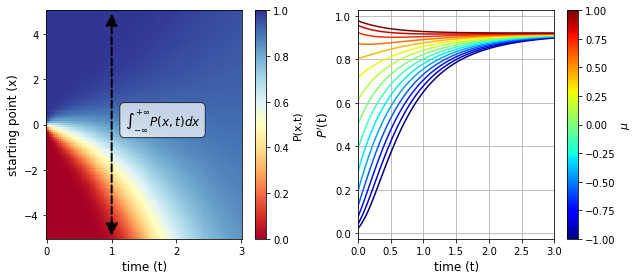

In [404]:
from sympy import *
import numpy as np
r,mu,s,x,y, t = symbols('r \\mu s x y t',real=True,positive=True)
a,b,c,d,t1 = symbols('a b c d t1',real=True,positive=True)
s1=s**2 *(1-exp(-2*r*t))/r
dd=integrate(1/sqrt(pi*d) * exp( -(a+t1)**2 / d),(t1,0,oo))
final=dd.subs(d,s1).subs(a,-mu-(x-mu)*exp(-r*t))
final.subs(t,oo).subs([(r,1),(s,1),(mu,4)]).evalf()


m1=1;r1=1;s1=1

pxy=lambdify([x,mu,r,s,t],final)
t1=np.linspace(1e-3,3,100)
x1=np.linspace(-5,5,100)
tt,xx=np.meshgrid(t1,x1)
p_tmp=pxy(xx,m1,r1,s1,tt).reshape(100,100)


fig,ax1=plt.subplots(1,2,figsize=(9,4))
fs=12
ax=ax1[0]
cnt=ax.pcolor(t1,x1,p_tmp,shading='auto',cmap="RdYlBu")
ax.set_ylabel("starting point (x)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)

axcb=plt.colorbar(cnt,ax=ax)
axcb.set_label(label="P(x,t)",fontsize=fs-1)
ax.annotate( '', xy=(1,-5),
              xytext=(1, 5),
            xycoords="data",
              arrowprops=dict( arrowstyle="<|-|>",mutation_scale=25,color="k",lw=2,ls="--" )
            )
ax.annotate( '$\\int_{-\\infty}^{+\\infty} P(x,t)dx$', xy=(1,-5),
              xytext=(1.2, 0),
            xycoords="data",
            bbox=dict(facecolor='w',alpha=0.7, edgecolor='black', boxstyle='round,pad=.4'),fontsize=fs)

from scipy.stats import norm
def gauss(x,mu,sig):return norm(loc = mu, scale = sig).pdf(x)

main=[]
n=15
mu_range=np.linspace(-1,1,n)
for start in mu_range:
    x=np.linspace(-100,100,1050)
    T=np.linspace(1e-3,3,100)
    s=[]
    for t in T:
        s.append(np.trapz(np.multiply(gauss(x,start,.5),pxy(x,m1,r1,s1,t)),x=x))
    main.append(s)
ax=ax1[1]
lc = multiline([T]*n, np.array(main), mu_range, cmap='jet', lw=1.5,ax=ax)
axcb = fig.colorbar(lc,ax=ax)
axcb.set_label(label="$\mu$",fontsize=fs-1)
ax.set_ylabel("$P^\\prime$(t)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)
ax.set_xlim(0,3)
ax.grid()
plt.tight_layout()

In [3]:
from scipy.special import erfc as erfc1
import matplotlib.pyplot as plt

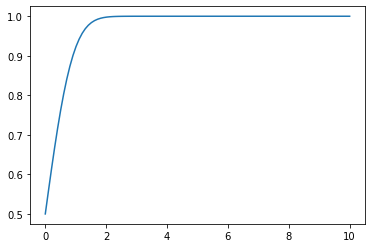

In [81]:
tmp=np.linspace(0,10,100)
plt.plot(tmp,1-erfc1(tmp)/2)